In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
Vehicules = pd.read_csv('Data/Véhicules.csv', sep=",", index_col='Unnamed: 0')
#index_col permet de mettre la marque en index sinon model ne marche pas car string
#véhicules.csv sur ent (pas stat l'autre)
Vehicules

,prix,Cylindree,Puissance,Poids,Consommation
Dalhatsu,11600.0,846.0,32.0,650.0,5.7
Suzuki_Swift,12490.0,993.0,39.0,750.0,5.8
Fiat_Panda,10450.0,899.0,29.0,730.0,6.1
Polo,17140.0,1390.0,44.0,955.0,6.5
Opel_Corsa,14825.0,1195.0,33.0,895.0,6.8
Subaru,13730.0,658.0,32.0,740.0,6.8
Toyota,19490.0,1331.0,55.0,1010.0,7.1
Ferrari,285000.0,5474.0,325.0,1690.0,21.2
Mercedes,183900.0,5987.0,300.0,2250.0,18.7
Maserati,92500.0,2789.0,209.0,1485.0,14.5


In [3]:
model = LinearRegression()
#ici avec sklearn on fait un modele régression lineaire
x = Vehicules.drop(columns=['Consommation'])
#x on enlève la colone de consommation
y = Vehicules['Consommation']
#y prend la valeur de la consommation
model.fit(x,y)
#remplit le modèle avec les données de x et y
ypred = model.predict(x)
#prédiction de erreurs
model.score(x,y)
#le score du modèle plus c'est proche de 1 mieux c'est

0.9551348705954427

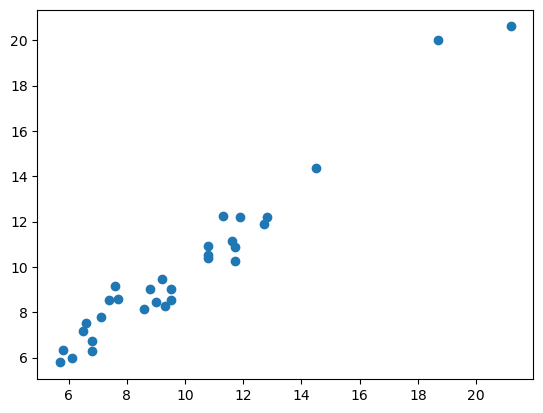

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=y, y=ypred)
#affichage avec matplotlib

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,ypred)*len(Vehicules)
#si on enlève le *len(Vehicules) on a alors l'erreur moyenne pour chaque véhicule or nous voulons tous les véhicules
#revient a faire la même chaose que ca -> sum((y-ypred)*(y-ypred))
#erreur quadratique somme de la différence entre y(conso) et ypred(prediction de conso)

17.043249577224113

In [6]:
model.coef_
#affiche les coefs pour la "formule" du cours

array([ 2.00107663e-05, -5.05045972e-04,  2.51093234e-02,  4.16929619e-03])

In [7]:
model.feature_names_in_
#prix * premeir coef + Cylindre * 2eme coef + Puissance * 3eme coef + Poids * 4eme coef
#formule du cours de la régression linéaire

array(['prix', 'Cylindree', 'Puissance', 'Poids'], dtype=object)

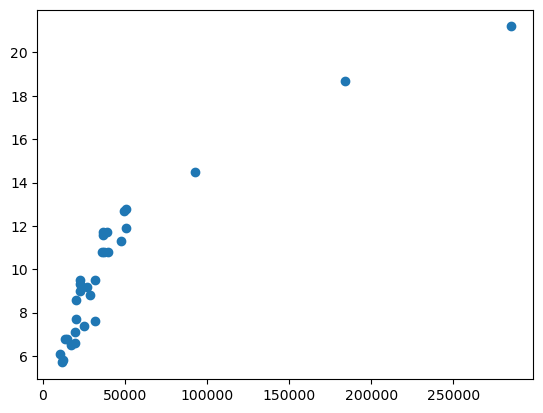

In [8]:
plt.scatter(data=Vehicules, x='prix', y='Consommation')

In [9]:
x['prix2'] = x['prix']*x['prix']
x['Cylindree2'] = x['Cylindree']*x['Cylindree']
x['Puissance2'] = x['Puissance']*x['Puissance']
x['Poids2'] = x['Poids']*x['Poids']

x["prixCy"] = x['prix']*x['Cylindree']
x["prixPu"] = x['prix']*x['Puissance']
x["prixPo"] = x['prix']*x['Poids']

x["CylindreePu"] = x['Cylindree']*x['Puissance']
x["CylindreePo"] = x['Cylindree']*x['Poids']
x["PuissancePo"] = x['Puissance']*x['Poids']   
#on ajoute les colonnes au carré pour avoir une meilleur prédiction
#on ajoute les colonnes avec les multiplications pour avoir une meilleur prédiction

In [10]:
model.fit(x,y)
ypred = model.predict(x)
model.score(x,y)
#en ajoutant les colonnes au carré on a une meilleur prédiction

0.9835255525555511

#### ne pas trop apprendre (donné des données )
Sinon courbe redescends -> savoir ou arrêter (Overfitting)